In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from in2stellar import Tracks, DenseNetworkGrid, set_seed
from interstellar import Tracks, DenseNetworkGrid, set_seed
%matplotlib inline

Load tracks with new MLT 2.5 grid

In [5]:
path = '/rds/projects/d/daviesgr-cartography/mesa_grid/grid2_zams_agb/simple_grid_alex/'

In [6]:
tracks = Tracks()

In [7]:
tracks.add_metadata(path)
tracks.get_metadata()

,file_path,m,Y,FeH,MLT,ov,dif
0,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.00,0.24,-0.1,2.3,0.0,1
1,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.94,0.32,0.0,2.5,0.0,1
2,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.92,0.28,-0.3,1.7,0.0,1
3,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.91,0.32,0.0,2.5,0.0,1
4,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.01,0.30,-0.1,2.5,0.0,1
...,...,...,...,...,...,...,...
12609,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.84,0.32,-0.1,2.3,0.0,1
12610,/rds/projects/d/daviesgr-cartography/mesa_grid...,0.84,0.28,-0.4,1.7,0.0,1
12611,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.13,0.26,0.1,2.1,0.0,1
12612,/rds/projects/d/daviesgr-cartography/mesa_grid...,1.10,0.28,-0.4,1.7,0.0,1


In [8]:
from interstellar.tracks import DATA_COLS

print(DATA_COLS)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit']


In [11]:
cols = DATA_COLS + ['surface_he4', 'surface_Z']
print(cols)

['initial_mass', 'initial_Yinit', 'initial_feh', 'initial_MLT', 'evol_stage', 'star_mass', 'star_age', 'frac_age', 'effective_T', 'log_g', 'luminosity', 'radius', 'star_feh', 'delta_nu_fit', 'surface_he4', 'surface_Z']


In [12]:
tracks.load_data(usecols=cols)
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit
0,0,1.0,0.24,-0.1,2.3,1.0,0.000117,0.000013,4645.111846,9.102513,4.664952,3.100195,0.239966,0.010769,-0.100123,12.421090
1,0,1.0,0.24,-0.1,2.3,1.0,0.000121,0.000013,4646.796973,8.869433,4.601499,3.112091,0.239967,0.010769,-0.100117,12.685399
2,0,1.0,0.24,-0.1,2.3,1.0,0.000125,0.000014,4647.737730,8.690322,4.552957,3.121302,0.239968,0.010769,-0.100103,12.894007
3,0,1.0,0.24,-0.1,2.3,1.0,0.000128,0.000014,4648.474193,8.553160,4.515453,3.128487,0.239969,0.010770,-0.100092,13.059153
4,0,1.0,0.24,-0.1,2.3,1.0,0.000130,0.000014,4649.057912,8.443823,4.485372,3.134292,0.239969,0.010770,-0.100084,13.194113


In [14]:
zx_sun = 0.0181

zx = 10.0**tracks.get_data('initial_feh') * zx_sun

tracks._data['initial_Zinit'] = (1.0 - tracks.get_data('initial_Yinit')) / (1.0 + 1.0/zx)

Note, evo_stage incorrectly defined. Instead we choose to cut the data given a fractional age above 0.01

In [15]:
condition = tracks.get_data('frac_age') > 0.01
tracks.select_data(condition)

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,initial_Zinit
423,1,1.00,0.24,-0.1,2.3,1.000000,0.101718,0.011245,5761.769950,0.750791,0.870776,4.558076,0.239467,0.010753,-0.101076,166.231104,0.010772
424,1,1.00,0.24,-0.1,2.3,1.000000,0.115514,0.012770,5762.374620,0.752437,0.871547,4.557307,0.239379,0.010749,-0.101265,166.011292,0.010772
425,1,1.00,0.24,-0.1,2.3,1.000000,0.132069,0.014600,5762.941699,0.754108,0.872343,4.556515,0.239273,0.010745,-0.101491,165.785809,0.010772
426,1,1.00,0.24,-0.1,2.3,1.000000,0.151936,0.016796,5763.497113,0.755837,0.873174,4.555688,0.239144,0.010740,-0.101767,165.551124,0.010772
427,1,1.00,0.24,-0.1,2.3,1.000000,0.175776,0.019431,5764.093057,0.757678,0.874056,4.554811,0.238991,0.010735,-0.102098,165.302955,0.010772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12951149,2,1.12,0.32,0.1,1.9,1.117182,5.160961,1.300383,5016.261144,4.292697,2.747032,3.608286,0.315549,0.014960,0.092133,31.403249,0.015150
12951150,2,1.12,0.32,0.1,1.9,1.117176,5.162723,1.300827,5014.258156,4.313443,2.755862,3.605496,0.315549,0.014960,0.092133,31.249675,0.015150
12951151,2,1.12,0.32,0.1,1.9,1.117170,5.164464,1.301265,5012.440330,4.333759,2.764348,3.602823,0.315685,0.014962,0.092283,31.096966,0.015150
12951152,2,1.12,0.32,0.1,1.9,1.117164,5.166181,1.301698,5010.615529,4.354397,2.772941,3.600125,0.315755,0.014963,0.092359,30.952028,0.015150


In [16]:
tracks.select_data(condition, inplace=True)

In [17]:
x_cols = ['frac_age', 'initial_mass', 'initial_MLT', 'initial_feh', 'initial_Yinit', 'initial_Zinit']
y_cols = ['star_age', 'effective_T', 'radius', 'delta_nu_fit', 'star_feh', 'surface_he4', 'surface_Z']

In [18]:
non_log = ['star_feh', 'initial_feh']
log_cols = [col for col in x_cols+y_cols if not any([col == n for n in non_log])]
log_cols

['frac_age',
 'initial_mass',
 'initial_MLT',
 'initial_Yinit',
 'initial_Zinit',
 'star_age',
 'effective_T',
 'radius',
 'delta_nu_fit',
 'surface_he4',
 'surface_Z']

In [19]:
tracks.log10(columns=log_cols, inplace=True)

In [20]:
x_cols = [f'log_{col}' if not any([col == n for n in non_log]) else col for col in x_cols ]
y_cols = [f'log_{col}' if not any([col == n for n in non_log]) else col for col in y_cols ]
print(x_cols)
print(y_cols)

['log_frac_age', 'log_initial_mass', 'log_initial_MLT', 'initial_feh', 'log_initial_Yinit', 'log_initial_Zinit']
['log_star_age', 'log_effective_T', 'log_radius', 'log_delta_nu_fit', 'star_feh', 'log_surface_he4', 'log_surface_Z']


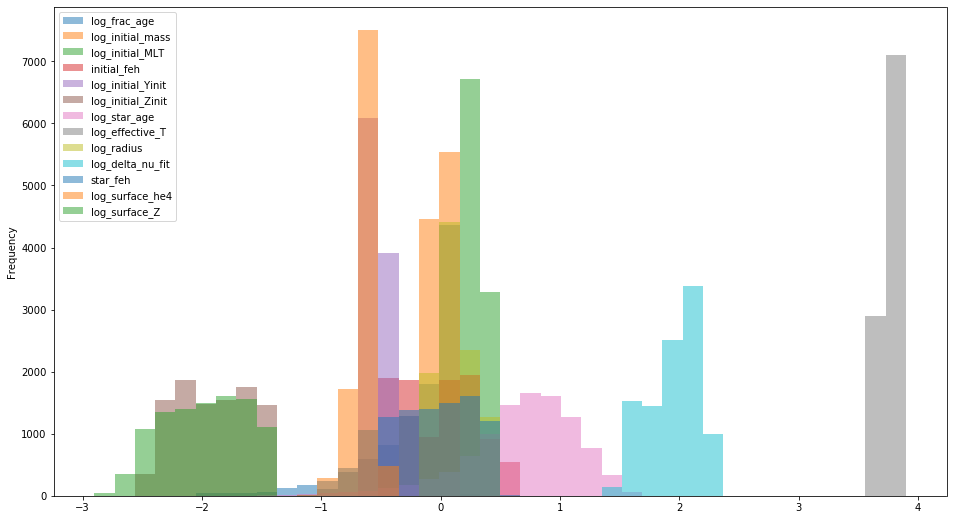

In [21]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 9))
tracks.sample_data(number=10000).plot(kind='hist', ax=ax,
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [22]:
fac, df = tracks.normalize(loc='50%', columns=x_cols+y_cols)
fac

,column,norm_column,loc,scale
0,log_frac_age,log_frac_age_norm,-0.067516,1.0
1,log_initial_mass,log_initial_mass_norm,0.000000,1.0
2,log_initial_MLT,log_initial_MLT_norm,0.278754,1.0
3,initial_feh,initial_feh_norm,0.000000,1.0
4,log_initial_Yinit,log_initial_Yinit_norm,-0.552842,1.0
5,log_initial_Zinit,log_initial_Zinit_norm,-1.905014,1.0
6,log_star_age,log_star_age_norm,0.742492,1.0
7,log_effective_T,log_effective_T_norm,3.754943,1.0
8,log_radius,log_radius_norm,0.092499,1.0
9,log_delta_nu_fit,log_delta_nu_fit_norm,1.994631,1.0


Let's simplfy the normalization factors by rounding them to 3 decimal places.

In [23]:
precision = 3
loc = round(fac['loc'], 3).to_list()
loc

[-0.068,
 0.0,
 0.279,
 0.0,
 -0.553,
 -1.905,
 0.742,
 3.755,
 0.092,
 1.995,
 -0.095,
 -0.622,
 -1.956]

In [24]:
del df

fac, df = tracks.normalize(loc=loc, columns=x_cols+y_cols)
fac

,column,norm_column,loc,scale
0,log_frac_age,log_frac_age_norm,-0.068,1.0
1,log_initial_mass,log_initial_mass_norm,0.000,1.0
2,log_initial_MLT,log_initial_MLT_norm,0.279,1.0
3,initial_feh,initial_feh_norm,0.000,1.0
4,log_initial_Yinit,log_initial_Yinit_norm,-0.553,1.0
5,log_initial_Zinit,log_initial_Zinit_norm,-1.905,1.0
6,log_star_age,log_star_age_norm,0.742,1.0
7,log_effective_T,log_effective_T_norm,3.755,1.0
8,log_radius,log_radius_norm,0.092,1.0
9,log_delta_nu_fit,log_delta_nu_fit_norm,1.995,1.0


In [25]:
df.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,initial_feh_norm,log_initial_Yinit_norm,log_initial_Zinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
423,-1.881058,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.734604,0.005556,-0.152094,0.225712,-0.006076,0.001246,-0.012479
424,-1.825820,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.679366,0.005601,-0.151709,0.225138,-0.006265,0.001086,-0.012614
425,-1.767652,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.621198,0.005644,-0.151313,0.224547,-0.006491,0.000894,-0.012777
426,-1.706793,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.560340,0.005686,-0.150899,0.223932,-0.006767,0.000660,-0.012976
427,-1.643494,0.0,0.082728,-0.1,-0.066789,-0.062707,-1.497041,0.005731,-0.150461,0.223281,-0.007098,0.000381,-0.013213


In [26]:
del df

In [27]:
tracks.normalize(loc=loc, columns=x_cols+y_cols, inplace=True)
tracks._data.head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,initial_feh_norm,log_initial_Yinit_norm,log_initial_Zinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
423,1,1.0,0.24,-0.1,2.3,1.0,0.101718,0.011245,5761.769950,0.750791,...,-0.1,-0.066789,-0.062707,-1.734604,0.005556,-0.152094,0.225712,-0.006076,0.001246,-0.012479
424,1,1.0,0.24,-0.1,2.3,1.0,0.115514,0.012770,5762.374620,0.752437,...,-0.1,-0.066789,-0.062707,-1.679366,0.005601,-0.151709,0.225138,-0.006265,0.001086,-0.012614
425,1,1.0,0.24,-0.1,2.3,1.0,0.132069,0.014600,5762.941699,0.754108,...,-0.1,-0.066789,-0.062707,-1.621198,0.005644,-0.151313,0.224547,-0.006491,0.000894,-0.012777
426,1,1.0,0.24,-0.1,2.3,1.0,0.151936,0.016796,5763.497113,0.755837,...,-0.1,-0.066789,-0.062707,-1.560340,0.005686,-0.150899,0.223932,-0.006767,0.000660,-0.012976
427,1,1.0,0.24,-0.1,2.3,1.0,0.175776,0.019431,5764.093057,0.757678,...,-0.1,-0.066789,-0.062707,-1.497041,0.005731,-0.150461,0.223281,-0.007098,0.000381,-0.013213


In [28]:
x_cols = [f'{col}_norm' for col in x_cols ]
y_cols = [f'{col}_norm' for col in y_cols ]
print(x_cols)
print(y_cols)

['log_frac_age_norm', 'log_initial_mass_norm', 'log_initial_MLT_norm', 'initial_feh_norm', 'log_initial_Yinit_norm', 'log_initial_Zinit_norm']
['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm', 'log_delta_nu_fit_norm', 'star_feh_norm', 'log_surface_he4_norm', 'log_surface_Z_norm']


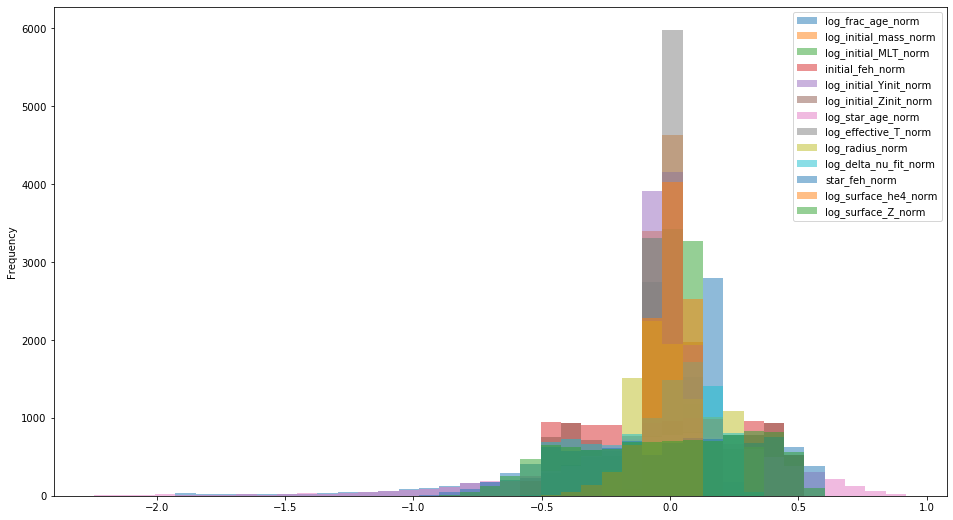

In [29]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 9))
tracks.sample_data(number=10000).plot(kind='hist', ax=ax,
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

Reduce size by converting to 32-bit float.

In [30]:
data = tracks.get_data(x_cols+y_cols).astype(np.float32)

Reset tracks data.

In [31]:
tracks.set_data(data)

In [32]:
save_path = '/rds/projects/d/daviesgr-alex-phd/interstellar_data/tracks_04'

tracks.save(save_path)